In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns_lib
%matplotlib inline
import warnings
warnings.filterwarnings = "ignore"
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

import math # for the haversine formula
import geopy.distance # for geodesic distance

In [37]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
data = pd.read_csv("../data/raw.csv")

In [40]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Cleaning data to perform EDA
-> Removing null values

-> Removing unwanted columns

-> extracting day of week, hour and month from datetime

-> calculating distance from the Haversine Formula

In [41]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [42]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


## Since there is only one row with null values, I am going to drop it

In [43]:
data = data.dropna()
data = data.reset_index()

In [44]:
data.isnull().sum()

index                0
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [45]:
data.describe()

,index,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,99999.560268,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,57735.309304,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,0.000000,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,49999.500000,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,100000.000000,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,149999.500000,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,199999.000000,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [46]:
data.columns

Index(['index', 'Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [47]:
data = data.drop(['Unnamed: 0', 'key'], axis=1)

In [48]:
data.head()

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [49]:
data['datetime'] = pd.to_datetime(data['pickup_datetime'])
data

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,datetime
0,0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00
1,1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00
2,2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00
3,3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00
4,4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00+00:00
...,...,...,...,...,...,...,...,...,...
199994,199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00+00:00
199995,199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00+00:00
199996,199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29 00:42:00+00:00
199997,199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20 14:56:25+00:00


In [50]:
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.weekday
data

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,datetime,month,hour,day_of_week
0,0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00,5,19,3
1,1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00,7,20,4
2,2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00,8,21,0
3,3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00,6,8,4
4,4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00+00:00,8,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00+00:00,10,10,6
199995,199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00+00:00,3,1,4
199996,199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29 00:42:00+00:00,6,0,0
199997,199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20 14:56:25+00:00,5,14,2


In [51]:
data = data.drop(['datetime', 'pickup_datetime'], axis=1)

In [52]:
data.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,day_of_week
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,19,3
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,20,4
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,21,0
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,8,4
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,17,3


## Finding the distance between the two points using the haversine formula

In [53]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    R = 6371.0
    distance = R * c
    
    return distance

In [55]:
# def calculate_distance(row):
#     coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
#     coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
#     return round(geopy.distance.distance(coords_1, coords_2).m, 2)

# # Apply the function to the DataFrame
# data['distance'] = data.apply(calculate_distance, axis=1)

# MUST ALSO TRY WITH GEODESIC DISTANCE

/home/dhatri/anaconda3/lib/python3.11/site-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


ValueError: Latitude must be in the [-90; 90] range.

In [18]:
data['pickup_longitude'][0]

-73.99981689453125

In [19]:
distances = []

for i in range(len(data)):
    lat1 = data['pickup_latitude'][i]
    lat2 = data['dropoff_latitude'][i]
    lon1 = data['pickup_longitude'][i]
    lon2 = data['dropoff_longitude'][i]
    dist = haversine(lat1, lon1, lat2, lon2)
    distances.append(dist)

In [20]:
distances

[1.683322752402931,
 2.4575898837790584,
 5.036377190242993,
 1.661683458435346,
 4.475449963028176,
 0.0,
 11.731014883538434,
 0.0,
 2.332711009340077,
 4.889416888104932,
 2.2508576218600655,
 0.0,
 0.30225169336801644,
 3.581250827378925,
 1.3099499000119,
 1.7162774216529932,
 0.7299655487752681,
 2.5159500721201353,
 1.7903192532933896,
 1.0347036107860215,
 2.4902437611965915,
 0.9594688591851598,
 1.2613880250404355,
 1.751762582083585,
 6.193235947014278,
 2.7361888046764697,
 0.7232527134113774,
 3.2294390767342174,
 1.4295153219088788,
 2.2336962262344073,
 13.053312139231668,
 1.8950465432768815,
 1.9049327090314097,
 3.1821134289666895,
 11.356140698271853,
 2.9230196514159985,
 1.2002121842415259,
 2.6357871666998025,
 2.253610790734642,
 9.961496456570083,
 4.826526866189426,
 1.2502909601091337,
 0.7984731247774794,
 0.8403949918801996,
 0.3851987079578982,
 2.434342813775855,
 3.1279052128174074,
 3.734645613940409,
 0.0,
 4.504354287329575,
 1.5578986978690137,
 4.923

In [21]:
data['distance'] = distances
data = data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'], axis=1)
data.head()

,index,fare_amount,passenger_count,month,hour,day_of_week,distance
0,0,7.5,1,5,19,3,1.683323
1,1,7.7,1,7,20,4,2.457590
2,2,12.9,1,8,21,0,5.036377
3,3,5.3,3,6,8,4,1.661683
4,4,16.0,5,8,17,3,4.475450


In [22]:
data.shape
data = data.drop('index', axis=1)

In [23]:
data

,fare_amount,passenger_count,month,hour,day_of_week,distance
0,7.5,1,5,19,3,1.683323
1,7.7,1,7,20,4,2.457590
2,12.9,1,8,21,0,5.036377
3,5.3,3,6,8,4,1.661683
4,16.0,5,8,17,3,4.475450
...,...,...,...,...,...,...
199994,3.0,1,10,10,6,0.112210
199995,7.5,1,3,1,4,1.875050
199996,30.9,2,6,0,0,12.850319
199997,14.5,1,5,14,2,3.539715


# EDA
1. Box plot for identifying outliers
2. Histogram to check for sknewness
3. Fare variation with time - Histogram with different ticks
4. Correlation analysis - Correlation matrix and pairplot

## Checking for outliers

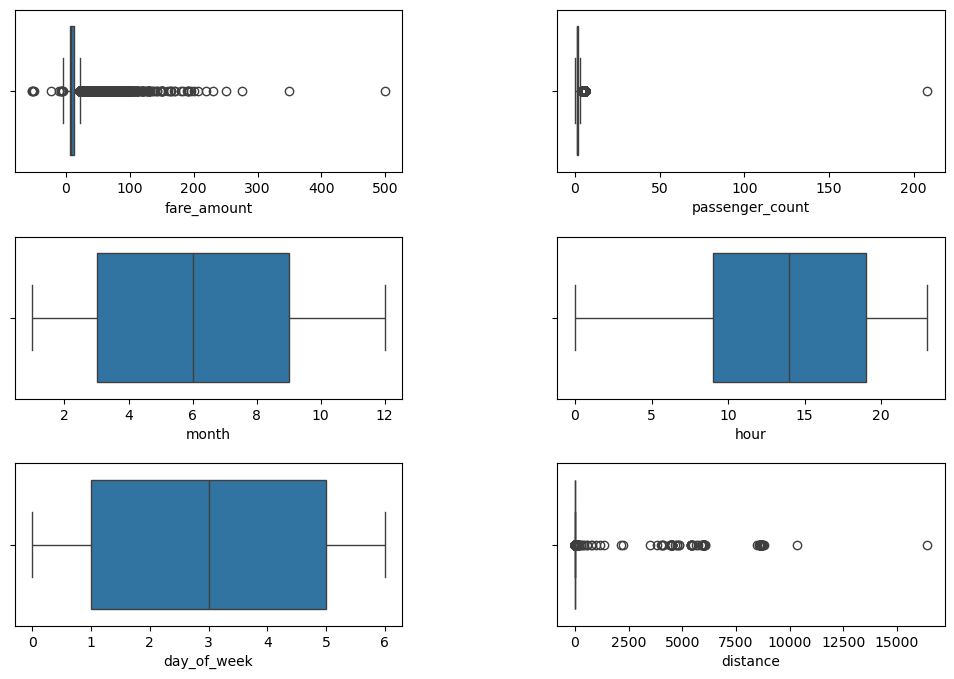

In [24]:
fig, axes = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

y = 0
for feature in data.columns:
    i, j = divmod(y, 2)
    sns_lib.boxplot(x=data[feature], ax=axes[i, j])
#     sns_lib.title(feature)
    y = y + 1

Remark: Fare amount, passenger count, and distance seem to have outliers.

## Checking for skewness

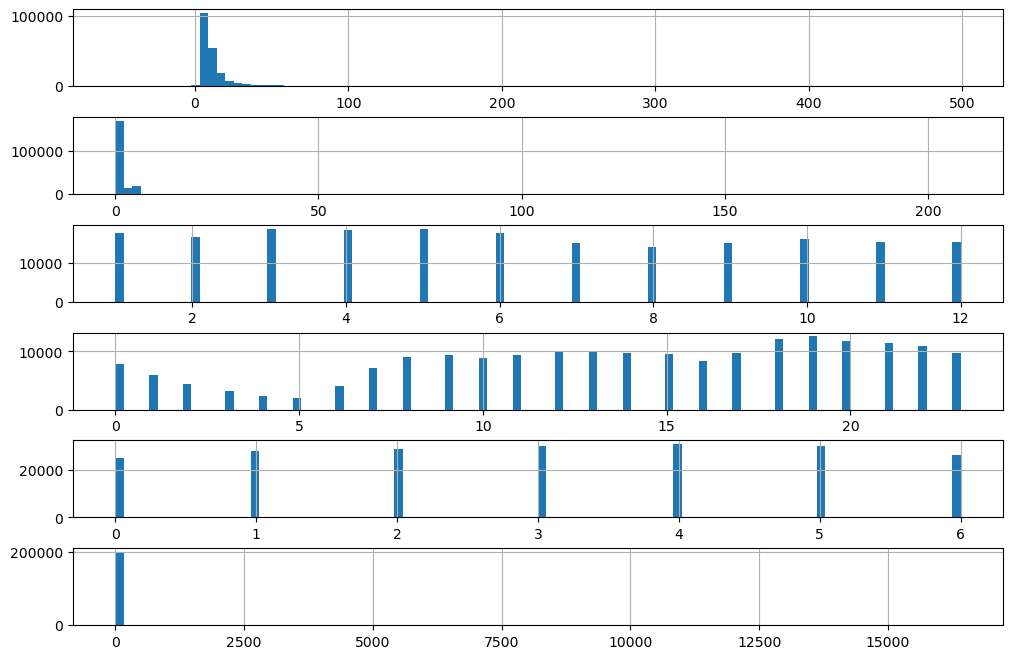

In [25]:
fig, axes = plt.subplots(6, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

y = 0
for column in data.columns:
    data[column].hist(bins=100, ax=axes[y])
    y = y + 1

Remarks: Have to perform log transformation to make the data continuous

Also, the valid range of values for latitude is -90 to 90, and longitude is -180 to 180. So should remove invalid latitudes and longitudes

## Temporal analysis

In [26]:
data.columns

Index(['fare_amount', 'passenger_count', 'month', 'hour', 'day_of_week',
       'distance'],
      dtype='object')

In [27]:
categorical_cols = ['passenger_count', 'month', 'hour', 'day_of_week']

In [28]:
data['hour'].value_counts()

hour
19    12605
18    12072
20    11755
21    11446
22    11023
13    10024
12     9924
23     9805
17     9758
14     9749
15     9614
11     9422
9      9339
8      9075
10     8944
16     8313
0      7844
7      7231
1      5908
2      4422
6      4139
3      3255
4      2365
5      1967
Name: count, dtype: int64

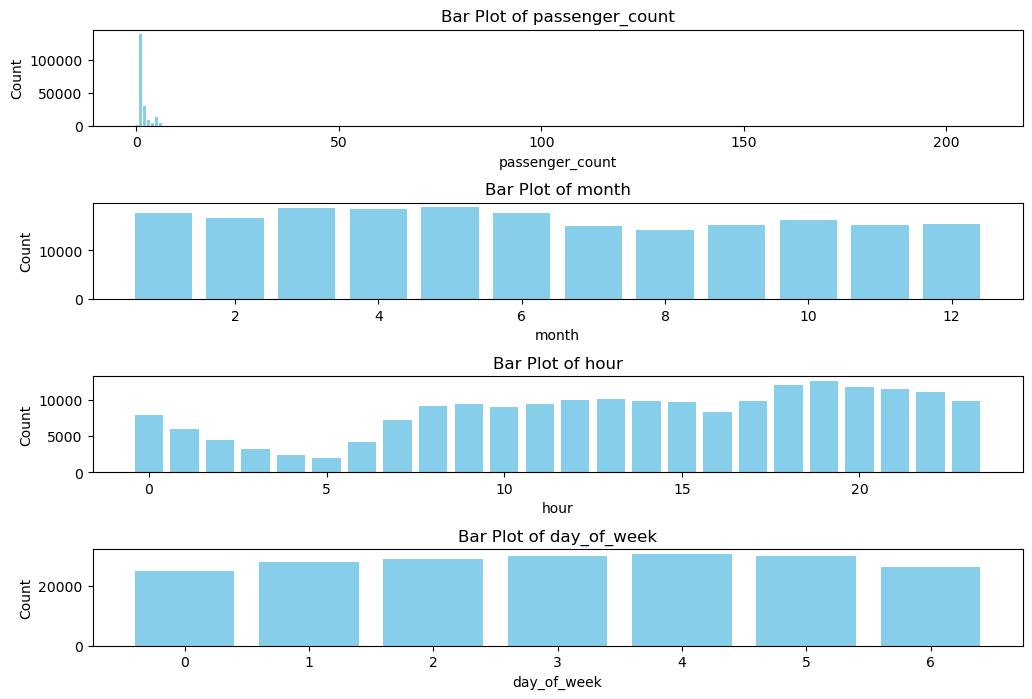

In [29]:
num_cols = len(categorical_cols)
fig, axs = plt.subplots(num_cols, 1)
plt.subplots_adjust(hspace=0.8)  # Adjust space between plots

# Plotting
for ax, col in zip(axs, categorical_cols):
    # Get unique values and their counts
    value_counts = data[col].value_counts()
    
    # Create a bar plot
    ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar Plot of {col}')

Remark: As of now, unable to decide clearly which factors affect the fare. Will check during model training.

## Correlation analysis

In [33]:
corr_matrix = data.corr()
corr_matrix

,fare_amount,passenger_count,month,hour,day_of_week,distance
fare_amount,1.000000,0.010158,0.023813,-0.021463,0.007508,0.024684
passenger_count,0.010158,1.000000,0.009774,0.013187,0.033189,-0.001472
month,0.023813,0.009774,1.000000,-0.003924,-0.008785,-0.000633
hour,-0.021463,0.013187,-0.003924,1.000000,-0.086956,-0.000638
day_of_week,0.007508,0.033189,-0.008785,-0.086956,1.000000,-0.004540
distance,0.024684,-0.001472,-0.000633,-0.000638,-0.004540,1.000000
